#### Boot cell

Skip if `module_update.py` is in same folder as notebook, next cell downloads this file which in turn will download other files.

In [2]:
! curl -s "https://raw.githubusercontent.com/Yoonsen/Modules/master/module_update.py" > "module_update.py"

#### Get essentials

Import text and graph modules for analysis, and css for display

In [3]:
from module_update import update, css, code_toggle, printmd

In [4]:
css()

### Start med å importere modulene

In [202]:
update('graph_networkx_louvain', overwrite=True)
update('nbtext', overwrite=True)
import nbtext as nb
import graph_networkx_louvain as gnl
import networkx as nx
from graph_networkx_louvain import cutdown, make_collocation_graph
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

Updated file `C:\Users\larsj\Documents\Notebookprosjekter\graph_networkx_louvain.py`

Updated file `C:\Users\larsj\Documents\Notebookprosjekter\nbtext.py`

In [6]:
import imp

In [7]:
imp.reload(nb)

<module 'nbtext' from 'C:\\Users\\larsj\\Documents\\Notebookprosjekter\\nbtext.py'>

In [8]:
nb.word_lemma('fiskende')

[['adj', 'fiske']]

In [9]:
nb.word_paradigm('fiske')

[['adj', ['fiska', 'fiskede', 'fiskende', 'fisket', 'fiskete']],
 ['subs', ['fiska', 'fiske', 'fiskene', 'fisker', 'fisket']],
 ['verb', ['fisk', 'fiska', 'fiske', 'fisker', 'fiskes', 'fisket']]]

In [10]:
import warnings
warnings.filterwarnings('ignore')

# Aggregerte data, trendlinjer og ordmodeller fra ngram




### Trendlinjer 

Data inntil trigram.

In [117]:
import pandas as pd

In [140]:
def compute_totals(ws, **kw):
    
    for w in ws:
        nb.unigram('og', period=(1800, 2015))

In [157]:
unigram = lambda x, **kw: nb.frame(nb.unigram(x, **kw), x)
unigrams = lambda x, **kw: nb.frame(pd.concat(map(lambda y: unigram(y, **kw), x), axis=1))

In [159]:
unigrams_add = lambda x, **kw: nb.frame(pd.concat(map(lambda y: unigram(y, **kw), x), axis=1).sum(axis=1), 'tot')

In [197]:
tot = unigrams_add(['og', 'eller', '.', ','], period=(1860, 1990))

In [198]:
kp = unigrams(", .".split(), period=(1860, 1980))

In [199]:
kp['abs'] = tot

In [200]:
kp_rel = pd.DataFrame()
for x in kp:
    kp_rel[x] = kp[x]/kp['abs']

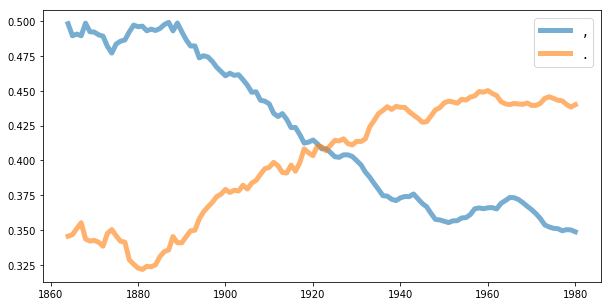

In [204]:

kp_rel[kp_rel.columns[:2]].rolling(window=5).mean().plot(figsize=(10,5), lw=5, alpha=0.6)
plt.ylim=(0)

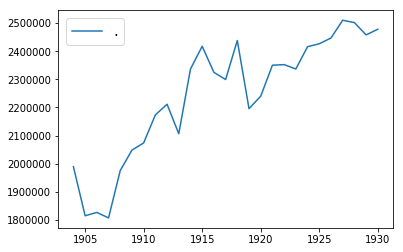

In [130]:
unigram('.', period=(1900, 1930)).rolling(window=5).mean().plot()

In [120]:
pd.concat([nb.unigram('.', period=(1900, 1930)), nb.unigram(',', period=(1900, 1930))], axis=1).rolling(window=5).mean().plot()

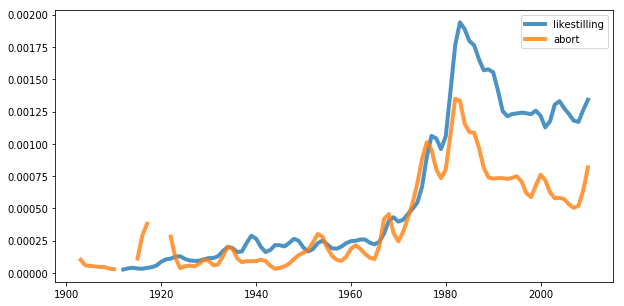

In [11]:
nb.nb_ngram("likestilling, abort", years=(1900, 2010), smooth=4, mode='rel').plot(figsize=(10,5), lw=4, alpha=0.8);

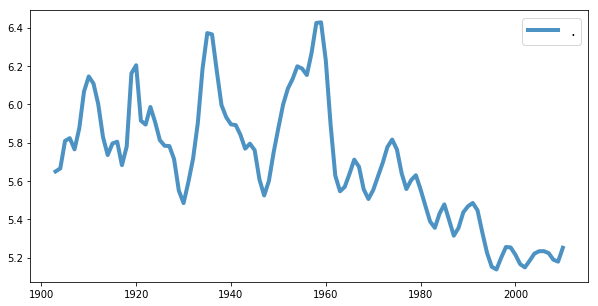

In [139]:
nb.nb_ngram(""". """, years=(1900, 2010), smooth=4, mode='rel').plot(figsize=(10,5), lw=4, alpha=0.8);

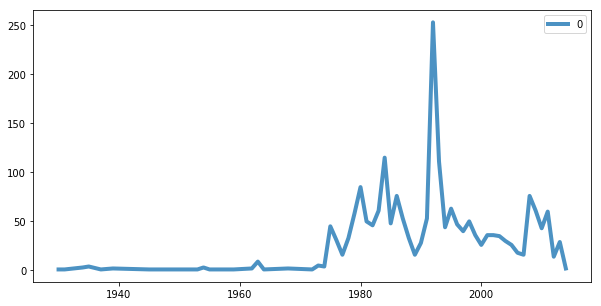

In [12]:
nb.unigram("kvinnehistorie", period=(1850, 2015), media='avis').plot(figsize=(10,5), lw=4, alpha=0.8);

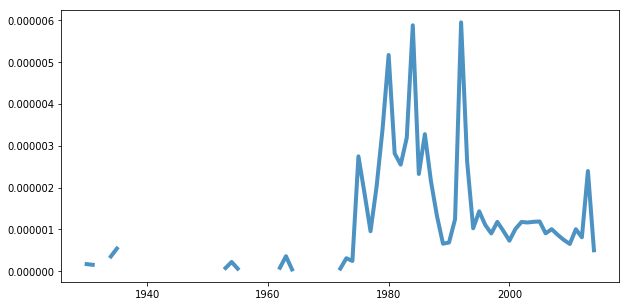

In [13]:
(nb.unigram("kvinnehistorie", period=(1850, 2015), media='avis')[0]/nb.unigram('.', period=(1850, 2015), media='avis')[0]).plot(figsize=(10,5), lw=4, alpha=0.8);

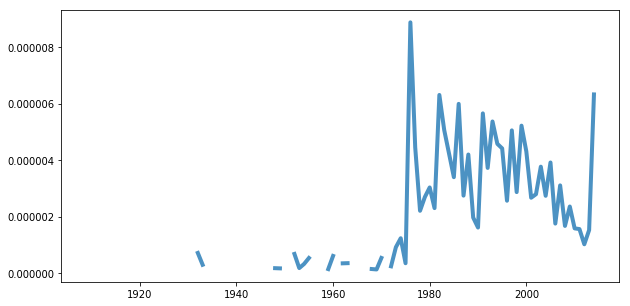

In [14]:
(nb.unigram("kvinnehistorie", period=(1850, 2015), media='bok')[0]/nb.unigram('.', period=(1850, 2015), media='bok')[0]).plot(figsize=(10,5), lw=4, alpha=0.8);

In [15]:
def unigrams(words, period=(1800, 2020), media='bok', ddk=None, topic=None, gender=None):
    import pandas as pd
    df = pd.DataFrame()
    for w in words:
        d = nb.unigram(w, period=period, media=media, ddk=ddk, topic=topic, gender=gender)
        if not d.empty:
            df[w] = d[0]
    return df.fillna(0)

In [16]:
kh = unigrams('kvinnehistorier Kvinnehistorier kvinnehistorie Kvinnehistorie'.split())

In [17]:
kh['sum'] = kh.sum(axis=1)

In [18]:
kh.rolling(window=5).mean().plot(figsize=(10,5), lw=4, alpha=0.8);

In [19]:
nb.concordance('Kvinnehistorie', yearfrom=2000, corpus='bok', before=10, after=10)

In [20]:
def uni_rel(word, comp=".", period=(1800, 2018), media=None, ddk=None, topic=None, gender=None):
    a = nb.unigram(word, period=period, media=media, ddk=ddk, topic=topic, gender=gender)
    b = nb.unigram(comp, period=period, media=media, ddk=ddk, topic=topic, gender=gender) 
    return nb.frame(a[0]/b[0], word)

In [21]:
nb.unigram("punk", period=(1850, 2015), media='avis').plot(figsize=(10,5), lw=4, alpha=0.8, legend=False);

In [22]:
from matplotlib import rc
rc('legend', fontsize=15)

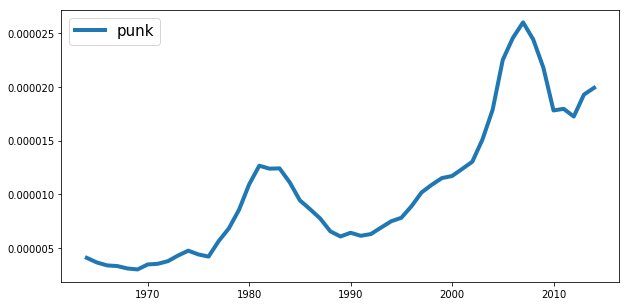

In [23]:

uni_rel("punk", period=(1960, 2015), media='avis').rolling(window=5).mean().plot(figsize=(10,5), lw=4)

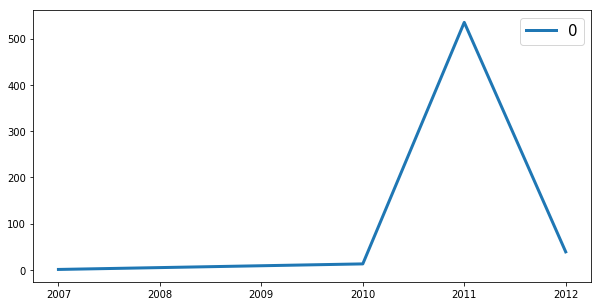

In [24]:
nb.unigram("Taqwacore", period=(1960, 2015), media='avis').plot(figsize=(10,5), lw=3)

In [26]:
nb.concordance(word='punk', yearfrom=1978,yearto=1982, corpus='avis', title="aften%", before=5, after=5)

In [27]:
punk = nb.collocation('punk', yearfrom=1975, yearto=1980, corpus='avis',before=10, after=10)

In [28]:
punk.sort_values(by=0, ascending=False)

0
.                 1054
,                  766
og                 578
i                  453
er                 402
som                293
det                249
av                 215
på                 214
«                  208
»                  205
med                184
til                175
en                 164
for                151
de                 144
-                  137
har                136
å                  134
'                  131
at                 124
den                109
rock               108
fra                103
om                 102
ikke               102
var                 94
:                   93
I                   87
new                 87
...                ...
dørstokken           1
dører                1
døgnfluefenomen-     1
dødperiode           1
edgai                1
dø                   1
dårligere            1
dårlige              1
dårlig               1
dystre               1
dyster               1
edelsenfoi           1
edruskapstil         1
eksemplare           1
egynnelsen           1
eksempal             1
ekk                  1
ek                   1
eiga                 1
eierne               1
eiendomm             1
eget                 1
ee                   1
egenthg              1
egenskapene          1
egan                 1
efterdønningene      1
eft                  1
efcsernpek           1
►                    1

[5577 rows x 1 columns]

In [29]:
p = nb.Cluster("punk", period=(1975, 1985), reference=400, before=10, after=10)

In [30]:
p2 = nb.Cluster("punk", period=(2008, 2012), reference=400, before=10, after=10)

In [31]:
p2.cluster_set(exponent=1.01)

In [32]:
p.cluster_set(exponent=1.01)

In [33]:
p.collocates.sort_values(by='punk', ascending=False)[:10]

punk
.    2087
,    1700
og   1199
i     758
er    695
som   520
det   429
av    428
med   406
til   406

In [34]:
import pandas as pd
combo = pd.DataFrame()
dfp1 = p.cluster_set(exponent=1.01, aslist=False)
dfp2 = p2.cluster_set(exponent=1.01, aslist=False)
dfp2.columns = ['2010']
dfp1.columns = ['1980']
combo = pd.concat([dfp1, dfp2], axis=1)

In [68]:
nb.heatmap??

In [69]:
nb.heatmap(combo.sort_values(by='1980', ascending=False)[:10]).to_excel('styled.xlsx', engine='openpyxl')

In [70]:
nb.heatmap(combo.sort_values(by='2010', ascending=False)[:10]).to_excel('styled-punk-2010.xlsx', engine='openpyxl')

In [ ]:
p.cluster_set(exponent=1.01, aslist=False)[:20]

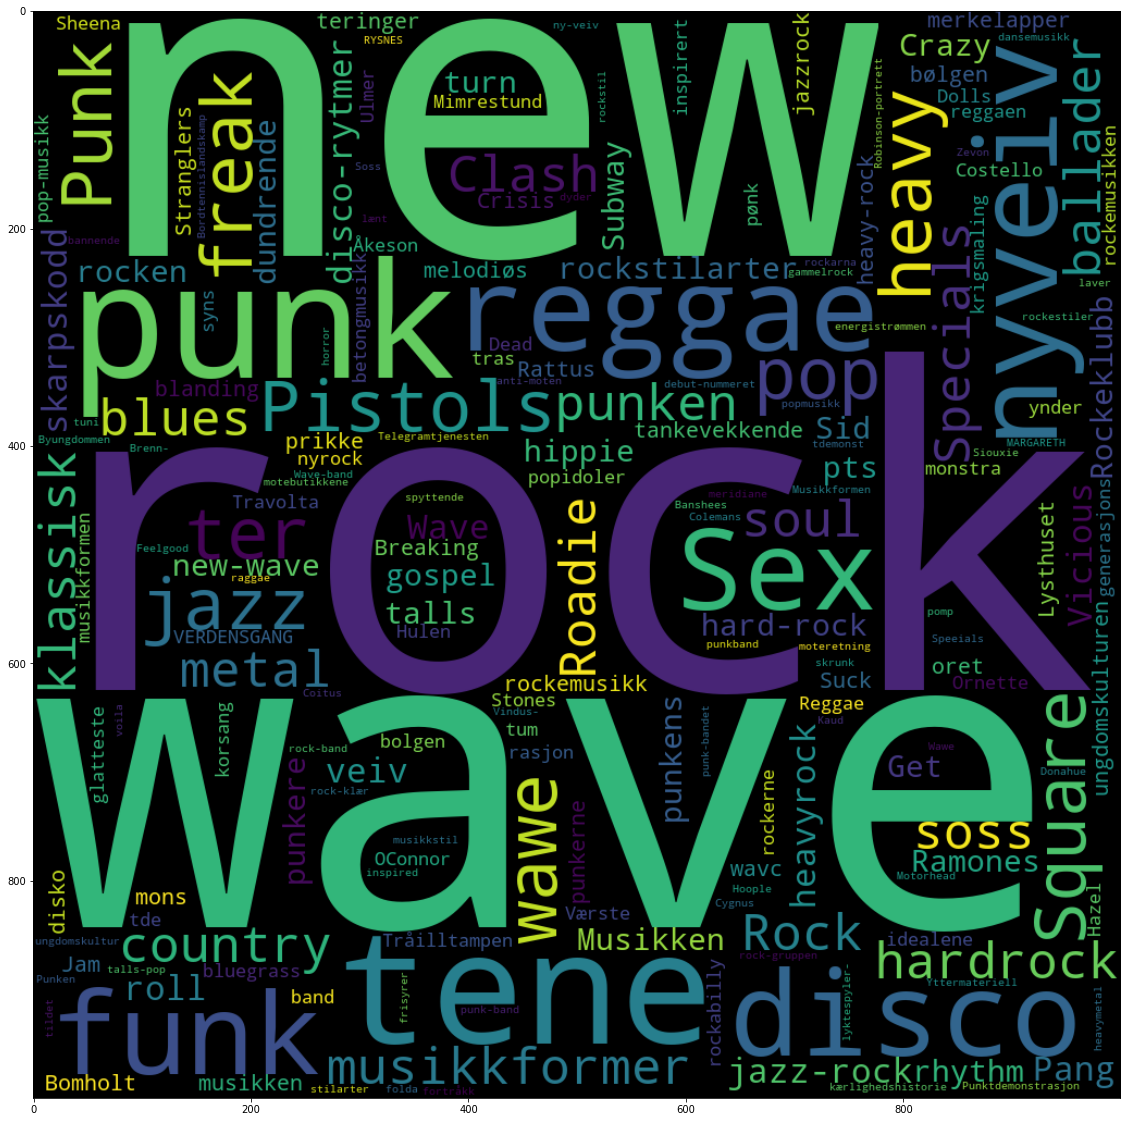

In [40]:
nb.cloud(p.cluster_set(exponent=1.01, aslist=False))

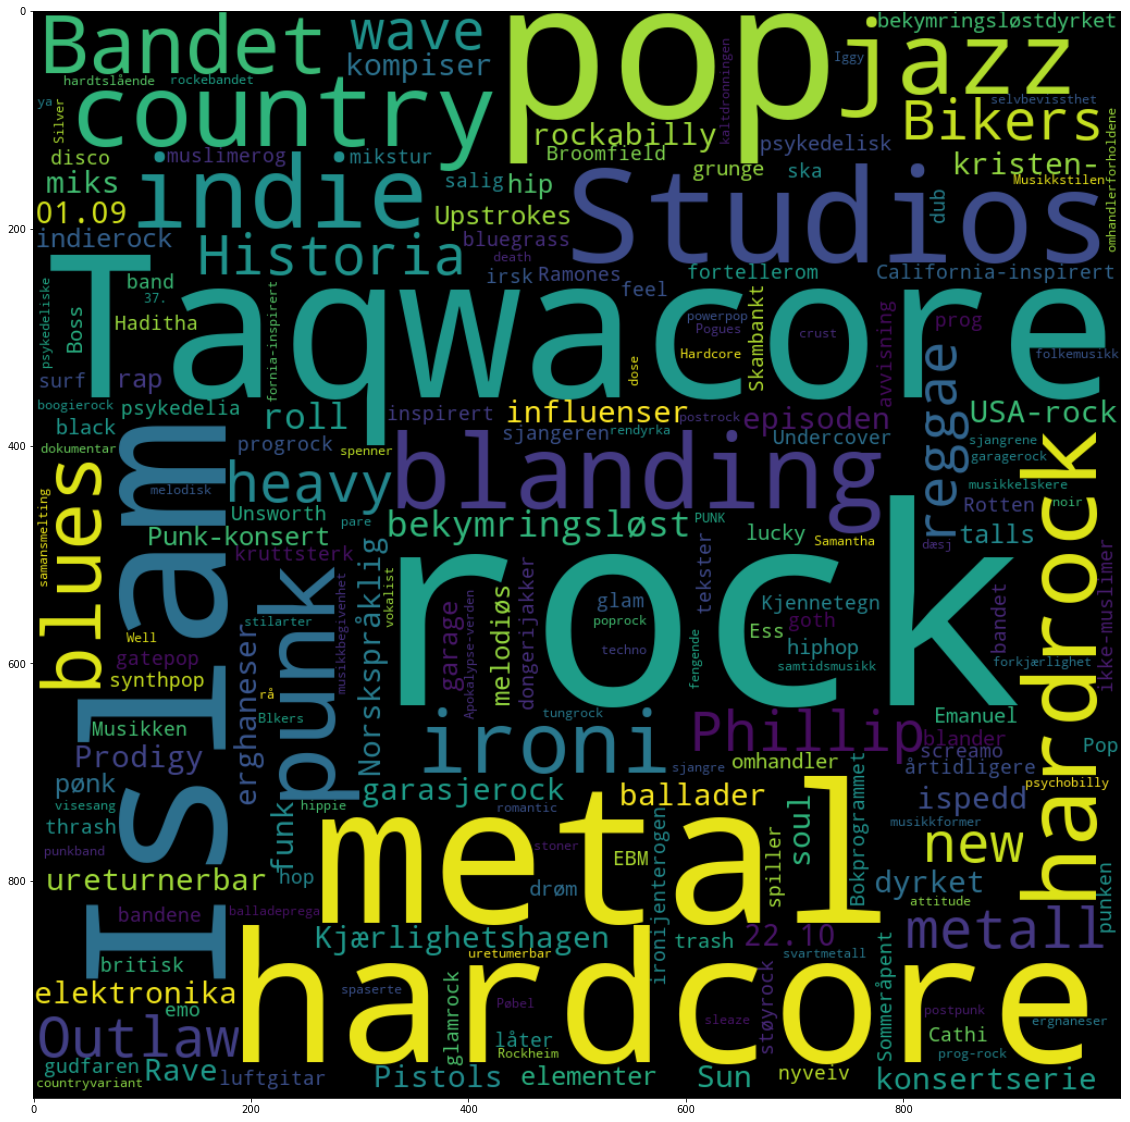

In [41]:
nb.cloud(p2.cluster_set(exponent=1.01, aslist=False))

In [42]:
nb.concordance('tene', corpus='avis', yearfrom=1975, yearto=1985)

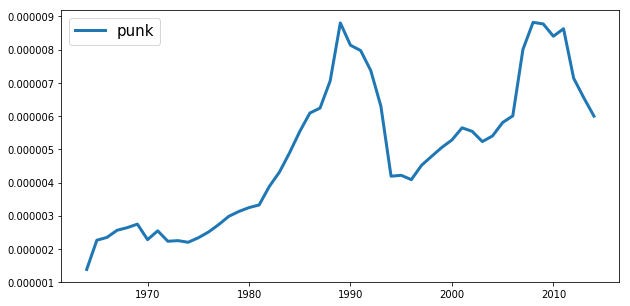

In [43]:
uni_rel("punk", period=(1960, 2015), media='bok').rolling(window=5).mean().plot(figsize=(10,5), lw=3)

In [44]:
nb.concordance(word="kvinnehistorie", yearfrom=1980, yearto=2000, corpus='avis')

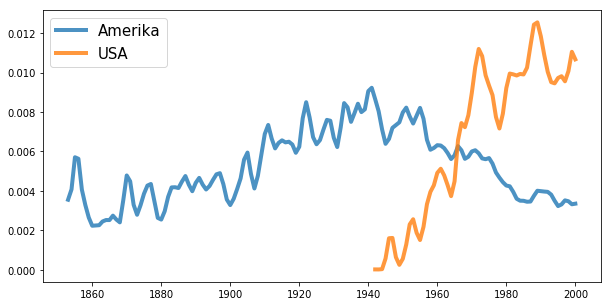

In [45]:
nb.nb_ngram("Amerika, USA", years=(1850, 2000),corpus='bok', smooth=4, mode='rel').plot(figsize=(10,5), lw=4, alpha=0.8);

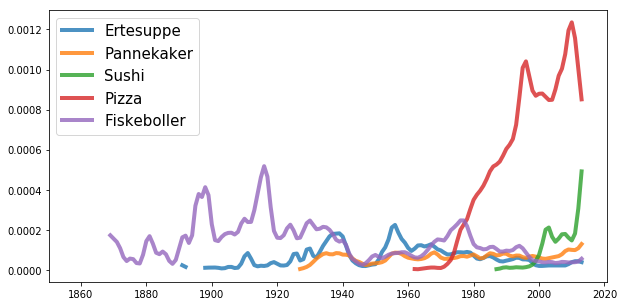

In [46]:
nb.nb_ngram("Ertesuppe, Pannekaker, Sushi, Pizza, Fiskeboller", years=(1850, 2020),corpus='avis', smooth=4, mode='rel').plot(figsize=(10,5), lw=4, alpha=0.8);

In [79]:
def ordnett(w, cutoff=12, spread=1.8, lang='nob'):
    import matplotlib.pyplot as plt
    G = nb.make_graph(w, cutoff=cutoff, lang=lang)
    gnl.show_graph(G, spread=1.8, fontsize=14);
    plt.savefig(w + '_word_graph.jpg')
    gnl.show_communities(G)
    return G

metall-tekstil :  metall, tekstil, plast, glass, jern, tre

country-blues :  country, blues, ock, rockabilly, roll, bluegrass, roots, danseband

rock-jazz :  rock, jazz, pop, folkemusikk, indie, klassisk, elektronika, swing, samtidsmusikk

punk-metal :  punk, metal, hardcore, hardrock, heavy, stonerrock, Rock, new, nyveiv, garasjerock

soul-disco :  soul, disco, funk, gospel, ska, reggae, hip, hop, rap, house



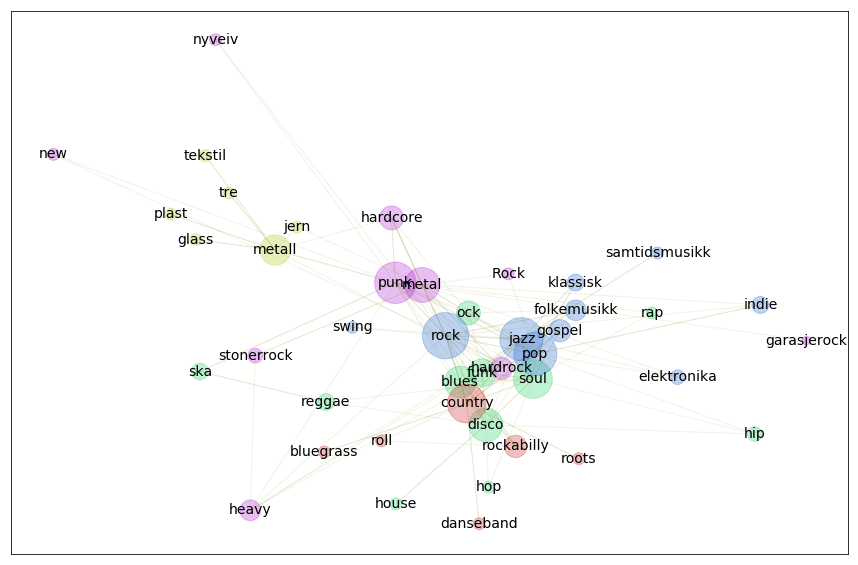

In [83]:
Punk = ordnett('punk', spread=2.2)

In [81]:
gnl.show_communities(Punk)

metall-tekstil :  metall, tekstil, plast, glass, jern, tre

country-blues :  country, blues, ock, rockabilly, roll, bluegrass, roots, danseband

rock-jazz :  rock, jazz, pop, folkemusikk, indie, klassisk, elektronika, swing, samtidsmusikk

punk-metal :  punk, metal, hardcore, hardrock, heavy, stonerrock, Rock, new, nyveiv, garasjerock

soul-disco :  soul, disco, funk, gospel, ska, reggae, hip, hop, rap, house



Klæbu-Melhus :  Klæbu, Melhus, Leinstrand, Støren, Skaun, Malvik, Byneset, Tiller, Orkdal, Trondheim, Buvik, Bratsberg, Selbu

Flå-Horg :  Flå, Horg, Sokna, Nes, Gulsvik, Singsås, Hølonda, Furnes, Flåa, Rise, Ørgenvika, Storsve

Gol-Hemsedal :  Gol, Hemsedal, Nesbyen, Ål, Geilo, Valdres, Hedalen, Hønefoss, Leira, Fagernes, Bagn, Trysil, Vinstra, Hallingdal

Hol-Aurland :  Hol, Aurland, Hovet, Al, Buksnes

Krødsherad-Sigdal :  Krødsherad, Sigdal, Modum, hjv, Ringerike



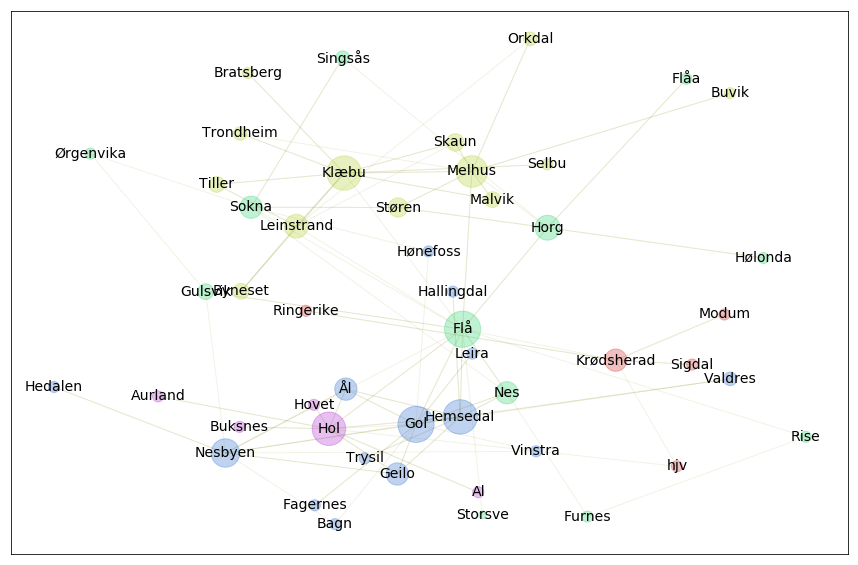

In [84]:
ordnett('Flå')

In [63]:
bipartition = lambda G: nx.algorithms.community.kernighan_lin_bisection(G.to_undirected())

retningslinjer-restriksjoner :  retningslinjer, restriksjoner, krav, regler, standarder, bestemmelser, spesifikasjoner, søknadsskjema, rutiner, prosedyrer, prinsipper, normer, forskrifter, forbud, påbud, lover, rasjonering, avgifter, forventninger, behov, reguleringer

bøter-straff :  bøter, straff, fengsel, fengselsstraff, fengselsstraffer, forelegg, gebyrer, inndragning, anmeldelse

spekemat-salater :  spekemat, salater, rømmegrøt, rømmegraut

pålegg-brødskiver :  pålegg, brødskiver, tvangsmulkt, middagsmat, ferdigmat, overtredelsesgebyr, kakao, halvfabrikata, posteier, brødmat, ferdigretter

pølser-saft :  pølser, saft, drikke, brus, hamburgere, øl, vafler, koteletter, is

smør-brød :  smør, brød, melk, kaker, flatbrød, mel, ost, fløte, olje, salat, mjølk, margarin, sukker

småretter-middag :  småretter, middag, kaffe, pizza, frokost, smørbrød, Lunsj

kjøtt-pølsevarer :  kjøtt, pølsevarer, egg, flesk, grønnsaker, fisk



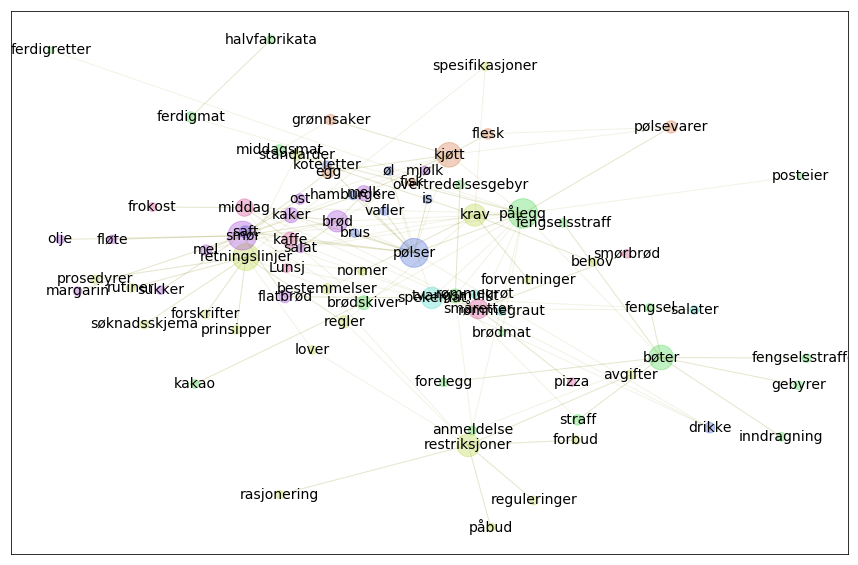

In [62]:
pålegg = ordnett('pålegg')

In [67]:
gnl.show_cliques(pålegg)

(3, 1) standarder, retningslinjer, spesifikasjoner, normer, regler, pålegg, krav, bestemmelser

(3, 2) brød, pølsevarer, kjøtt, melk, mel, pålegg, kaker, pølser, egg, flesk, ost, smør

(3, 3) middag, småretter, pålegg, kaker, Lunsj



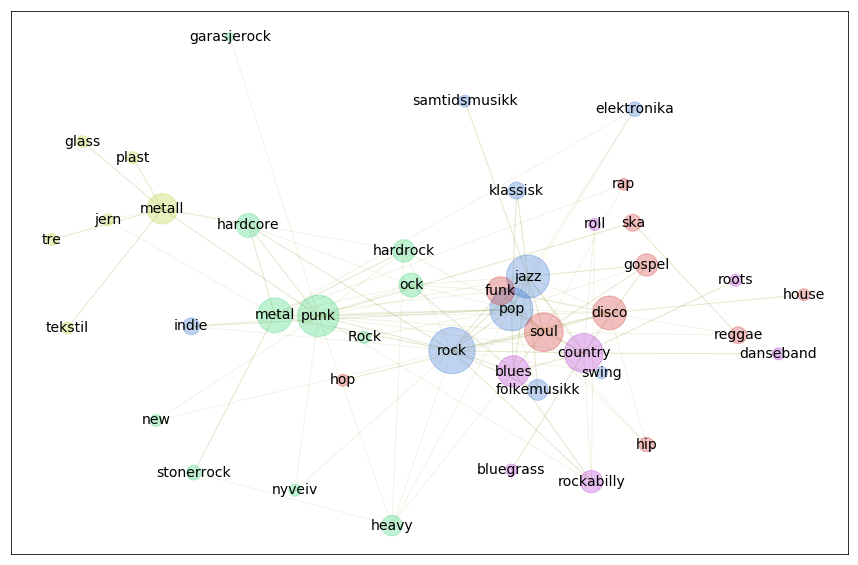

In [58]:
gnl.show_graph(Punk, spread=2.8, fontsize=14)

ansiktet-brystet :  ansiktet, brystet, magen, nakken, hodet, halsen, hendene, kroppen

overgrep-mishandling :  overgrep, mishandling, drap, tortur, voldtekt, seksuelle, voldtekter, omsorgssvikt, mord, incest, korrupsjon, kidnapping, maktmisbruk, fysiske, krenkelser, bortføring, vanskjøtsel

spark-slag :  spark, slag, hjerteinfarkt, støt, sans, stot, hogg, gips, spring, Kom, nøyaktighet, vibrasjoner, spenn, krykker, rykk, sammenlagt, støv, bitt, hjerneslag, kreft, angina, hastigheter, hugg, lugging, ørefiker, lungekreft, interesse, Slag, knyttnever, utenpåsatte

krave-krage :  krave, krage, forkanter, ermer, muffe, lommer, lommeklaffer, kappe, mansjetter, oppslag, lue

størrelser-varianter :  størrelser, varianter, farver, modeller, prisklasser, typer, kvaliteter, farger, utførelser, fasonger

vold-kriminalitet :  vold, kriminalitet, sex, brutalitet, rus, narkotika, dop, rusmisbruk, alkohol, urettferdighet, prostitusjon, erotikk, ungdom, ondskap, stoffmisbruk, råskap, psykiatri, traumat

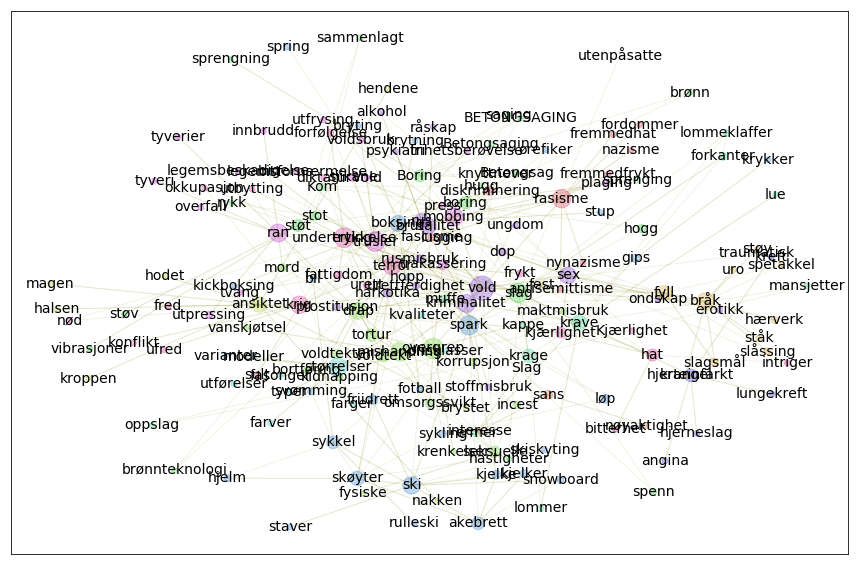

In [49]:
ordnett('slag, spark, vold')

In [ ]:
G = ordnett('Eis', cutoff=16, lang='ger');

In [ ]:
gnl.show_cliques(G)

In [ ]:
ordnett('cabincruisere, daycruisere')

In [ ]:
gnl.show_graph(G, spread=1.6)

In [ ]:
korpus = nb.book_urn(ddk='230%', period=(1960, 2020), limit=50)
nb.urn_concordance(word='sakramentene', urns=korpus, size=5)

In [86]:
def term_extract(ddk=None, subject=None, title=None, total=None, period=(1960,2020), limit=50, factor=10):
    if total is  None:
        print("Må ha med total")
        return
    korp_ddk = nb.book_urn(ddk=ddk, subject=subject, title=title, limit=limit, period=period)
    print(len(korp_ddk), korp_ddk[:5])
    ddk_agg = nb.get_aggregated_corpus(korp_ddk)
    result = nb.frame((ddk_agg[0]/total[0]).sort_values(ascending=False), ddk)
    cut = result.loc['.']*factor
    return result.loc[result[result > cut].dropna().index]

In [122]:
korp_ddk = nb.book_urn(ddk="355.02%", limit=5)
ddk_agg = nb.get_aggregated_corpus(korp_ddk)

In [88]:
tot = nb.frame(nb.totals(40000))

In [147]:
ddk_krig = term_extract(ddk="355.02%", total=tot, period=(1980, 2020), limit=200, factor=10)

22 [[2014052606021, 'Østerud, Øyvind', 'Hva er krig', 2009], [2016010608035, '', 'Totalforsvaret', 1998], [2012062205088, 'Klippenberg, Erik', 'Våpenteknologi og konvensjonelt forsvar', 1984], [2010030100008, 'Haaland, Torunn Laugen', 'Bruk av norske styrker i kampen mot internasjonal terrorisme', 2004], [2012071638053, '', 'Historiens folk og riker', 1992]]


In [150]:
tit_krig = term_extract(title="%krig%", total=tot, period=(1980, 2020), limit=200, factor=10)

200 [[2010102009043, 'Tjaum, Bjørn', 'Norsk penge- og kredittpolitikk i etterkrigstiden', 1990], [2008080700087, '', 'Tusenårsstedet Kald krig-globen', 1998], [2008110600029, '', 'Krig i det 21. århundre', 2000], [2013120238047, 'Rimbereid, Knut', 'Fitjar i krig', 1995], [2013102505095, 'Jensen, Carsten', 'Krigskrønike', 2005]]


In [151]:
sub_krig = term_extract(subject="Krig", total=tot, period=(1980, 2020), limit=200, factor=10)

200 [[2008032504012, 'Bjørnsen, Bjørn', 'Under bomberegnet', 1995], [2013081305016, 'Gaarder, Inger Margrethe', 'Hvem kan glemme dette?', 1984], [2012101205010, 'Larsen, Rolf-Petter', 'Ledelse og mestring i krig og fred', 2000], [2014020408041, '', 'FNs konvensjon om barnets rettigheter', 2003], [2015010848049, 'Folman, Ari', 'Vals med Bashir', 2009]]


In [152]:
sub_krig

0
Afghanistan   0.046865
kp            0.042076
Irak          0.031591
Hjem          0.017278
Forsvaret     0.015563
War           0.015096
styrkene      0.013703
Forsvarets    0.013569
sovjetiske    0.012929
svenska       0.012376
festningen    0.012117
sivile        0.011927
allierte      0.011513
militære      0.011503
krigens       0.011473
soldater      0.011398
soldatene     0.010858
konvensjon    0.010794
bomber        0.010694
sjøfolk       0.010464
militær       0.010279
Soviet        0.010274
okkupasjonen  0.010256
USAs          0.010128
sårede        0.009762
militært      0.009693
muslimer      0.009513
sovjetisk     0.009502
Emil          0.009469
Alan          0.009150
...                ...
kampene       0.007426
armé          0.007399
tyskere       0.007387
Kongsvinger   0.007332
kompani       0.007287
fienden       0.007144
flyktninger   0.007143
Etiopia       0.007095
troppene      0.007090
Røde          0.007037
kanoner       0.006915
offiserene    0.006701
ammunisjon    0.006691
territorium   0.006678
bombe         0.006665
tortur        0.006649
tyske         0.006612
operasjoner   0.006599
hovedkvarter  0.006549
våpnene       0.006546
Hitlers       0.006499
journalister  0.006412
Homer         0.006381
britiske      0.006376
angrepet      0.006169
Levanger      0.006150
Iran          0.006145
aksjoner      0.006092
FN            0.006062
nordmennene   0.006057

[85 rows x 1 columns]

In [153]:
ddk_krig

355.02%
fiendens        0.005243
military        0.005136
War             0.004786
militære        0.003816
Afghanistan     0.003712
styrkene        0.003445
operasjoner     0.003197
styrker         0.003122
konvensjonelle  0.003038
militær         0.003022
sivile          0.002823
militært        0.002815
kriger          0.002745
USAs            0.002708
operations      0.002689
strategiske     0.002665
strategisk      0.002495
Forsvarets      0.002459
NATO            0.002420
krigens         0.002107
våpnene         0.001992
forces          0.001969
fienden         0.001955
operative       0.001943
Forsvaret       0.001926
krig            0.001925
versjonen       0.001901
Sovjetunionen   0.001766
Irak            0.001749
sovjetiske      0.001724
...                  ...
materiell       0.000390
preferanser     0.000389
begreper        0.000389
admiral         0.000388
stråling        0.000388
Boken           0.000386
reformer        0.000386
aggresjon       0.000385
krise           0.000385
dilemma         0.000385
svekke          0.000385
begrepene       0.000384
Hensikten       0.000383
modem           0.000382
utgaven         0.000381
studien         0.000381
definisjoner    0.000380
firmaet         0.000380
soldatene       0.000379
amerikanere     0.000377
pågår           0.000376
fleksibilitet   0.000376
Special         0.000376
støtten         0.000375
Cambridge       0.000375
Lenin           0.000374
2005.           0.000374
States          0.000374
europeiske      0.000374
training        0.000372

[345 rows x 1 columns]

In [154]:
tit_krig

0
sovjetiske    0.016283
Afghanistan   0.016182
styrkene      0.014795
Irak          0.013778
armé          0.012159
Tyskerne      0.011553
tyskerne      0.011238
allierte      0.011219
fiendens      0.010721
svenska       0.010538
1814.         0.010314
krigens       0.009666
Frans         0.009420
soldater      0.009189
okkupasjonen  0.009170
fronten       0.008985
Roosevelt     0.008433
bomber        0.008371
britene       0.008352
soldatene     0.008344
militære      0.008308
tyskere       0.008245
Hitlers       0.008134
amerikanerne  0.008116
troppene      0.008066
forsyninger   0.008004
styrker       0.007901
Pierre        0.007843
kampene       0.007837
tyske         0.007802
...                ...
1944.         0.006769
Will          0.006704
krigen        0.006639
fienden       0.006615
kanoner       0.006462
militær       0.006424
sovjetisk     0.006344
operasjoner   0.006287
krig          0.006231
Avdeling      0.006178
fangene       0.005992
ammunisjon    0.005990
1942.         0.005804
hæren         0.005695
1940          0.005694
kriger        0.005671
admiral       0.005562
løytnant      0.005561
Carter        0.005552
kameraet      0.005537
Boris         0.005533
japanske      0.005532
propaganda    0.005418
offiserene    0.005351
falne         0.005351
militært      0.005313
bombe         0.005307
Hønefoss      0.005262
1942          0.005256
soldat        0.005161

[74 rows x 1 columns]

In [341]:
humord = term_extract(subject='Trondheim',total=tot, period=(1980, 2000))

[[2009100104003, 'Storemyr, Per', 'Tekniske undersøkelser, sikringstiltak og vedlikehold av Nidarosdomen 1904-1995', 1995], [2012092608199, 'Hammarstrøm, Gunne', 'søt historie', 1987], [2012102208058, 'Lillegaard, Leif B.', 'I storm og stille på alle hav', 1982], [2007082304030, '', 'Refleksjoner', 1990], [2010042203010, 'Haarberg, Gunnar', 'Trivelige Trondheim', 1997]]


In [361]:
købenext = term_extract(subject='København',total=tot, period=(1960, 2000))

[[2010070603015, 'Guldvog, Eirik', 'Takk', 1995], [2015111308053, 'Brochmann, Odd', 'Seværdige København', 1968], [2015021106038, 'Rottem, Øystein', 'Vårt København', 2000], [2010072210010, 'Leonard, Vernon', 'København', 1997], [2008101400099, '', 'Å styre det komplekse-', 2000]]


In [ ]:
ddk_krig

In [137]:
nb.frame(nb.book_urn(subject="Krig", period=(1960, 2000), limit=50), "urn forfatter tittel år".split())[:10]

urn            forfatter                                tittel  \
0  2012061106081  Heradstveit, Daniel                 Mediakrigen i Libanon   
1  2014030606047   Drakulić, Slavenka                     Balkan-ekspressen   
2  2007071001046          Riste, Olav                   "London-regjeringa"   
3  2010061808098  Rossing, Unni Thiis                - og de hadde hjelmer!   
4  2010050308101          Riste, Olav                   "London-regjeringa"   
5  2007110600085        Skogheim, Dag                                 Osten   
6  2012101507085           Dalai Lama                Med mennesket for fred   
7  2009110204074         Kerr, Judith  Da Hitler stjal den lyserøde kaninen   
8  2013112838001         Forstrøm, O.                Fredrikshald i 250 aar   
9  2012112808117          Tveit, Tore                Etter den store krigen   

     år  
0  1983  
1  1994  
2  1979  
3  1995  
4  1995  
5  1992  
6  1988  
7  1979  
8  1990  
9  1984

In [277]:
t230 = term_extract(ddk="230%", total=tot)
t230

230%
Aalen             0.084215
teologien         0.024784
teologi           0.024743
åpenbaringen      0.017704
Theologie         0.017059
sakramentene      0.015060
teologiske        0.013052
teologisk         0.012651
skaperverket      0.011984
åpenbaring        0.011768
Skaperen          0.011319
teologer          0.011215
oppstandelsen     0.011030
frelsen           0.010778
Åndens            0.010652
syndenes          0.010605
troens            0.010545
Ånden             0.010491
hellighet         0.010477
evangeliene       0.010068
oppstandelse      0.009580
skapelsen         0.009320
GT                0.009221
forkynnelsen      0.008792
Andens            0.008786
postmoderne       0.008672
dogmatiske        0.008514
evangeliet        0.008455
evangelium        0.008271
evangeliets       0.008247
...                    ...
påberoper         0.001463
vanære            0.001462
døpe              0.001462
sjelene           0.001460
premisser         0.001457
velsignelse       0.001456
dragning          0.001455
Israel            0.001455
Augsburg          0.001454
Sannelig          0.001453
gudstjeneste      0.001453
selvbevissthet    0.001450
kjærligheten      0.001448
erfarenheter      0.001446
beretningene      0.001445
Satans            0.001445
uverdige          0.001444
lyster            0.001443
vantro            0.001442
kosmisk           0.001442
overgitt          0.001439
narrative         0.001437
nåtid             0.001437
ansvarlighet      0.001437
doktoravhandling  0.001437
tenkningen        0.001436
K.E               0.001434
sanninga          0.001434
menneske.         0.001433
Amerikansk        0.001432

[861 rows x 1 columns]

In [89]:
t784 = term_extract(ddk="784%", total=tot)
t784

50 [[2015042408108, 'Kvandal, Johan', 'Concerto for oboe and string orchestra, op. 46', 1981], [2007112304052, 'Kvamme, Elsa', 'Ting som små piker liker', 1991], [2008051904066, 'Dillan, Helge', 'Talekunnskap', 1960], [2016022909515, 'Köhler, Emmy', 'Nå tennes tusen julelys', 2006], [2013043006154, 'Cohen, Jacques', 'Yigdal', 2010]]


784%
Beatles     0.052142
Mick        0.033649
korpset     0.025884
Brian       0.018992
bass        0.017725
gitar       0.016207
Keith       0.015793
LP          0.015548
korps       0.012518
JOHN        0.009966
Live        0.008475
Edition     0.008336
Band        0.007962
brit        0.007803
dirigent    0.007609
konserten   0.007364
Night       0.007298
amer        0.007041
musikere    0.006620
konsert     0.006336
blues       0.006126
Theatre     0.005869
Klein       0.005762
Liverpool   0.005716
orkesteret  0.005704
Vardal      0.005610
fans        0.005581
medvirket   0.005562
konserter   0.005472
BBC         0.005284
...              ...
orgelet     0.000728
overbodet   0.000726
Spencer     0.000726
Hev         0.000724
Armstrong   0.000723
Tommy       0.000723
Seinere     0.000722
klubb       0.000721
Plaza       0.000720
Kings       0.000720
Stan        0.000716
Sunday      0.000716
Terje       0.000716
Los         0.000714
Ferguson    0.000713
utgitt      0.000713
Death       0.000713
tilhørere   0.000711
fremført    0.000711
Texas       0.000710
Bach        0.000708
Teddy       0.000706
Skar        0.000705
Jacobs      0.000704
Times       0.000704
About       0.000703
heavy       0.000703
tjuefem     0.000703
893         0.000701
arrangerte  0.000698

[577 rows x 1 columns]

In [90]:
import json

In [91]:
def paradigms(terms, top=500):
    paras = dict()
    for w in terms[:top].index:
        #print(w)
        para = nb.word_paradigm(w)
        if para == [] and w.endswith('s'):
            para = nb.word_paradigm(w[:-1])
            if para == [] and w[0].isupper():
                para = nb.word_paradigm(w.lower())
                if para == []:
                    para = nb.word_paradigm(w.lower()[:-1])
                    if para == []:
                        para = [['propr', [w[:-1], w]]]
        elif para == [] and not w.endswith('s'):
            if w[0].isupper():
                para = nb.word_paradigm(w.lower())
                if para == []:
                    para = [['propr',[w, w+'s']]]
        paras[w] = para
    return paras

In [319]:
para641 = paradigms(t641)

In [92]:
para784 = paradigms(t784)

In [343]:
hum_trheim = paradigms(humord)

In [282]:
cluster = dict()
for k in paras:
    ckey = json.dumps(paras[k])
    if ckey in cluster:
        cluster[ckey].append(k)
    else:
        cluster[ckey] = [k]

In [96]:
para784

{'Beatles': [['propr', ['Beatle', 'Beatles']]],
 'Mick': [['propr', ['Mick', 'Micks']]],
 'korpset': [['subs', ['korps', 'korpsa', 'korpsene', 'korpset']]],
 'Brian': [['propr', ['Brian', 'Brians']]],
 'bass': [['subs', ['bass', 'bassen', 'bassene', 'basser']]],
 'gitar': [['subs', ['gitar', 'gitaren', 'gitarene', 'gitarer']]],
 'Keith': [['propr', ['Keith', 'Keiths']]],
 'LP': [['subs', ['LP', 'LPen', 'LPene', 'LPer']]],
 'korps': [['subs', ['korps', 'korpsa', 'korpsene', 'korpset']]],
 'JOHN': [['propr', ['JOHN', 'JOHNs']]],
 'Live': [['adj',
   ['liva', 'livede', 'livende', 'livet', 'livete', 'livd', 'livde', 'live']],
  ['subs', ['live']],
  ['verb',
   ['liv', 'liva', 'live', 'liver', 'lives', 'livet', 'livd', 'livde']]],
 'Edition': [['propr', ['Edition', 'Editions']]],
 'Band': [['adj', ['banda', 'bandede', 'bandende', 'bandet', 'bandete']],
  ['subs', ['band', 'banda', 'bandene', 'bandet']],
  ['verb', ['band', 'banda', 'bande', 'bander', 'bandes', 'bandet']]],
 'brit': [],
 'd

In [93]:
def lemma_group(paras):
    cluster_lemma = dict()
    for k in paras:
        ckey = paras[k]
        if ckey != []:
            ckey = ckey[0][1][0]
        else:
            ckey = 'ukjent'
        if ckey in cluster_lemma:
            cluster_lemma[ckey].append(k)
        else:
            cluster_lemma[ckey] = [k]
    return cluster_lemma

In [160]:
tit_krig_lem = lemma_group(paradigms(tit_krig))

In [104]:
musikk_lem = lemma_group(paradigms(nb.frame(para784)))

In [105]:
musikk_lem

{'Beatle': ['Beatles'],
 'Mick': ['Mick'],
 'korps': ['korpset', 'korps'],
 'Brian': ['Brian'],
 'bass': ['bass'],
 'gitar': ['gitar', 'gitaren'],
 'Keith': ['Keith'],
 'LP': ['LP'],
 'JOHN': ['JOHN'],
 'liva': ['Live', 'live'],
 'Edition': ['Edition'],
 'banda': ['Band', 'bandet'],
 'ukjent': ['brit',
  'amer',
  '“',
  'apr.',
  'kein',
  '”',
  '748',
  'added',
  'tr',
  'bl',
  'avgårde',
  'feb.',
  '826',
  'mf',
  'himlens'],
 'dirigent': ['dirigent'],
 'konsert': ['konserten', 'konsert'],
 'Night': ['Night'],
 'musiker': ['musikere', 'musiker'],
 'blues': ['blues'],
 'Theatre': ['Theatre'],
 'klein': ['Klein'],
 'Liverpool': ['Liverpool'],
 'orkester': ['orkesteret', 'orkester'],
 'Vardal': ['Vardal'],
 'fans': ['fans'],
 'medvirka': ['medvirket'],
 'konserterende': ['konserter'],
 'BBC': ['BBC'],
 'Elvi': ['Elvis'],
 'dobbel': ['dobbel'],
 'Stone': ['Stone'],
 'gruppa': ['Gruppa', 'gruppa'],
 'back': ['Back'],
 'Your': ['Your'],
 'Please': ['Please'],
 'NRK': ['NRKs', 'NRK'],

In [108]:
show(musikk_lem)

**Beatle**:  Beatles

**Mick**:  Mick

**korps**:  korpset, korps

**Brian**:  Brian

**bass**:  bass

**gitar**:  gitar, gitaren

**Keith**:  Keith

**LP**:  LP

**JOHN**:  JOHN

**liva**:  Live, live

**Edition**:  Edition

**banda**:  Band, bandet

**ukjent**:  brit, amer, “, apr., kein, ”, 748, added, tr, bl, avgårde, feb., 826, mf, himlens

**dirigent**:  dirigent

**konsert**:  konserten, konsert

In [97]:
t784

784%
Beatles     0.052142
Mick        0.033649
korpset     0.025884
Brian       0.018992
bass        0.017725
gitar       0.016207
Keith       0.015793
LP          0.015548
korps       0.012518
JOHN        0.009966
Live        0.008475
Edition     0.008336
Band        0.007962
brit        0.007803
dirigent    0.007609
konserten   0.007364
Night       0.007298
amer        0.007041
musikere    0.006620
konsert     0.006336
blues       0.006126
Theatre     0.005869
Klein       0.005762
Liverpool   0.005716
orkesteret  0.005704
Vardal      0.005610
fans        0.005581
medvirket   0.005562
konserter   0.005472
BBC         0.005284
...              ...
orgelet     0.000728
overbodet   0.000726
Spencer     0.000726
Hev         0.000724
Armstrong   0.000723
Tommy       0.000723
Seinere     0.000722
klubb       0.000721
Plaza       0.000720
Kings       0.000720
Stan        0.000716
Sunday      0.000716
Terje       0.000716
Los         0.000714
Ferguson    0.000713
utgitt      0.000713
Death       0.000713
tilhørere   0.000711
fremført    0.000711
Texas       0.000710
Bach        0.000708
Teddy       0.000706
Skar        0.000705
Jacobs      0.000704
Times       0.000704
About       0.000703
heavy       0.000703
tjuefem     0.000703
893         0.000701
arrangerte  0.000698

[577 rows x 1 columns]

In [102]:
import matplotlib.pyplot as plt

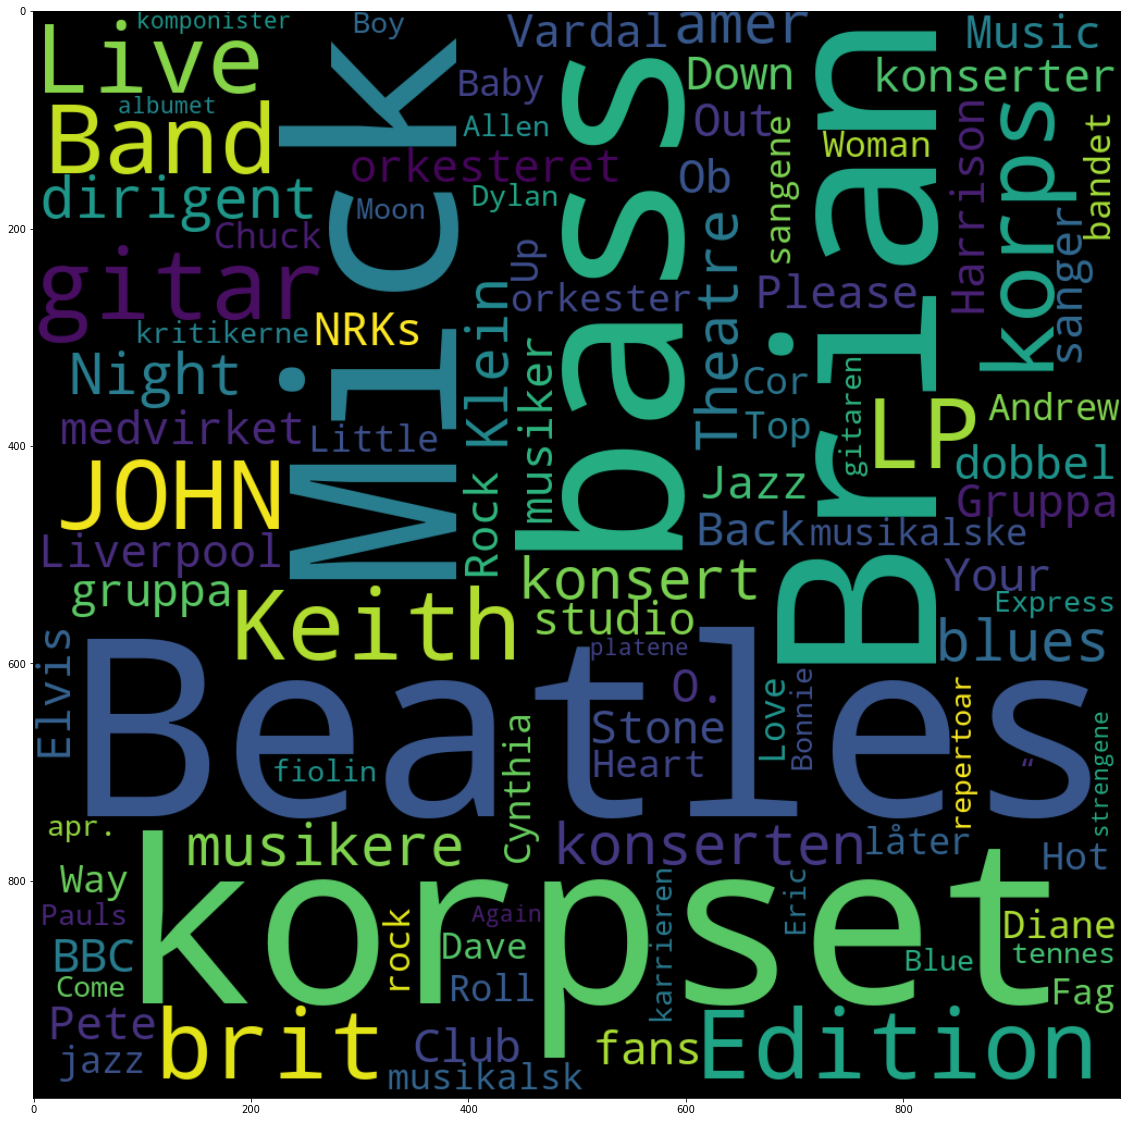

In [103]:
nb.cloud(t784[:100])
plt.savefig('ddk784.jpg')

In [161]:
show(tit_krig_lem

{'sovjetisk': ['sovjetiske', 'sovjetisk'],
 'Afghanistan': ['Afghanistan'],
 'styrke': ['styrkene'],
 'Irak': ['Irak'],
 'armeen': ['armé'],
 'tysker': ['Tyskerne', 'tyskerne'],
 'allierende': ['allierte'],
 'fiende': ['fiendens', 'fienden'],
 'ukjent': ['svenska',
  '1814.',
  '1941.',
  '1945.',
  '1940.',
  '1944.',
  '1942.',
  '1940',
  '1942'],
 'krig': ['krigens', 'krigen'],
 'Fran': ['Frans'],
 'soldat': ['soldater', 'soldatene', 'soldat'],
 'okkupasjon': ['okkupasjonen'],
 'front': ['fronten'],
 'Roosevelt': ['Roosevelt'],
 'bomba': ['bomber', 'bombe'],
 'brite': ['britene'],
 'militær': ['militære', 'militær', 'militært'],
 'tysk': ['tyskere', 'tyske'],
 'Hitler': ['Hitlers', 'Hitler'],
 'amerikaner': ['amerikanerne'],
 'tropp': ['troppene'],
 'forsyning': ['forsyninger'],
 'styrka': ['styrker'],
 'Pierre': ['Pierre'],
 'kamp': ['kampene'],
 'War': ['War'],
 'troppa': ['tropper'],
 'sivil': ['sivile'],
 'fly': ['flyene'],
 'Etiopia': ['Etiopia'],
 'kompani': ['kompani'],
 'Ch

In [344]:
theim = lemma_group(hum_trheim)

In [107]:
def show(lemmagroups, top=15):
    for x in list(lemmagroups.keys())[:top]:
        printmd("**"+x+"**" ':  ' + ', '.join(lemmagroups[x]))

In [ ]:
nb.cloud()

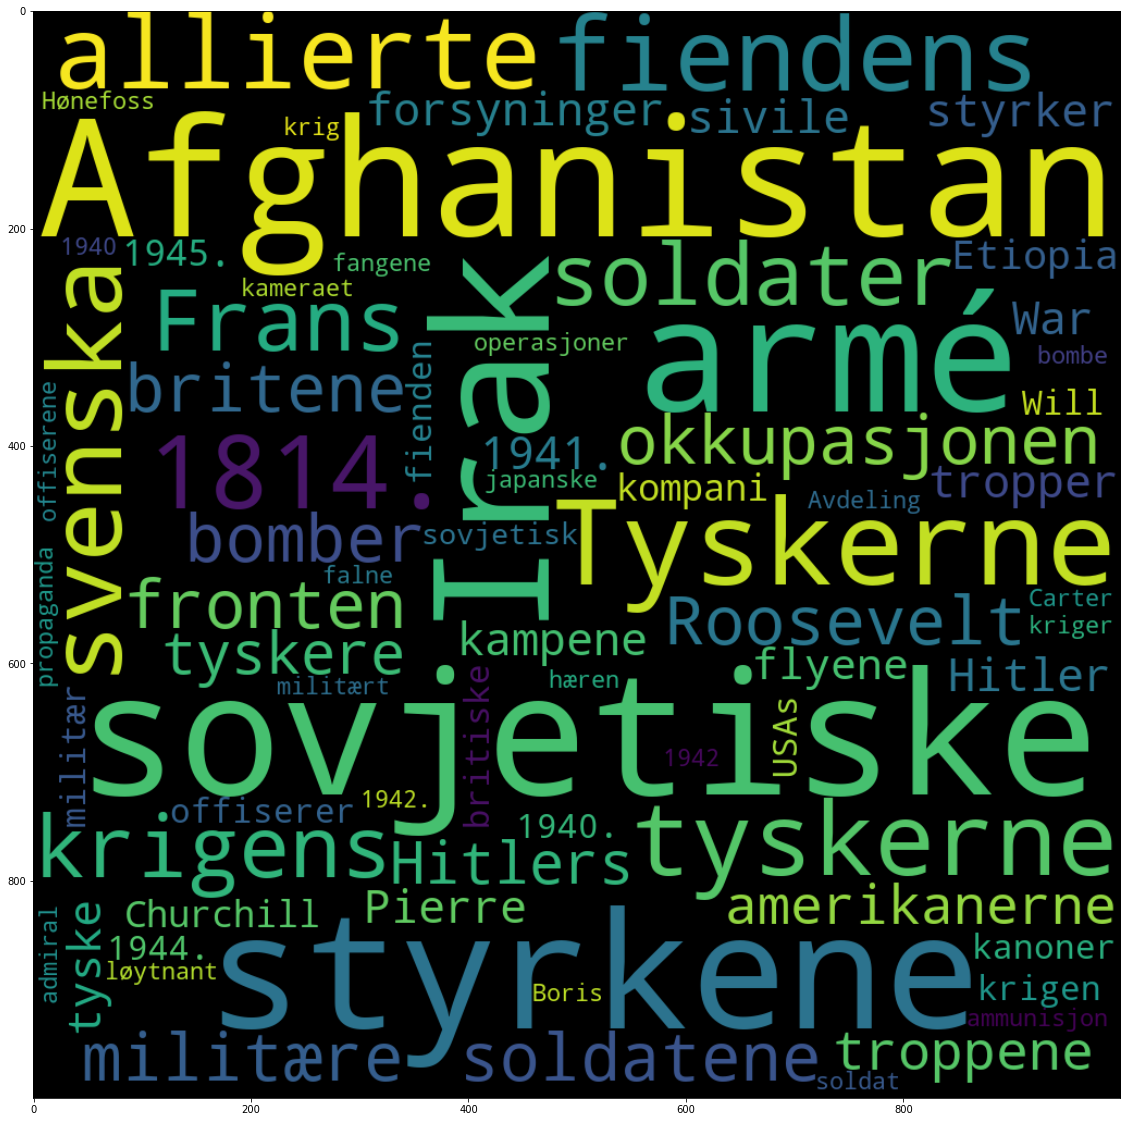

In [164]:
nb.cloud(tit_krig)

In [166]:
nb.cloud(ddk_krig)

In [167]:
ddk_krig_lem = lemma_group(paradigms(ddk_krig))

In [168]:
show(ddk_krig_lem)

**fiende**:  fiendens, fienden, fiende

**ukjent**:  military, operations, forces, war, conflict, nuclear, force, strategy, achieve, states, peace, political, thinking, 2007., security, 2008., effort, principles, 1.000, 2003., success, concept, actors, politics, power, vektlegging, 2006., http, indeed, future, history, 2005., training

**War**:  War

**militær**:  militære, militær, militært

**Afghanistan**:  Afghanistan

**styrke**:  styrkene

**operasjon**:  operasjoner, operasjonen, operasjon

**styrka**:  styrker

**konvensjonell**:  konvensjonelle

**sivil**:  sivile, sivil

**kriga**:  kriger, krig, Krig

**USA**:  USAs, USA

**strategisk**:  strategiske, strategisk

**forsvar**:  Forsvarets, Forsvaret, forsvaret

**NATO**:  NATO

In [163]:
show(tit_krig_lem)

**sovjetisk**:  sovjetiske, sovjetisk

**Afghanistan**:  Afghanistan

**styrke**:  styrkene

**Irak**:  Irak

**armeen**:  armé

**tysker**:  Tyskerne, tyskerne

**allierende**:  allierte

**fiende**:  fiendens, fienden

**ukjent**:  svenska, 1814., 1941., 1945., 1940., 1944., 1942., 1940, 1942

**krig**:  krigens, krigen

**Fran**:  Frans

**soldat**:  soldater, soldatene, soldat

**okkupasjon**:  okkupasjonen

**front**:  fronten

**Roosevelt**:  Roosevelt

In [345]:
show(theim)

**ukjent**:  fradelt, boforhold, accidents, elderly, deposits, fractures, adults, ►, 1681, wall, aged, building, foundations, clay, destruction, stones, pit, buildings, workshop, floor, timber, horizon, foundation, perceptions, deposit, traits, attitudes, toward, 1647, levekår, eS, åldre, standardisering, registration, supports, lay, presumably, målstyring, itj, stone, interpreted, eastern, grupp, 023, phases, viewed, psychological, 1100, driftsform, phase, beam, possibly, walls, bolig-, rating, passage, wooden, analys, old, southern, subjects, formerly, females, remains, inserted, gravel, fill, young, occupation, sørsiden, desentralisering, structural, demokratisering, folkemunne, incidence, læringsmiljø, street, spd, mesta, positively, constructions, prosessar, south, consisted, severity, 284, bolighus, west, contexts, edge, injury, max., rooms, younger, sexes, layers, similarities, 899, diam, preserved, omdøpt, shallow, lowest, site, assigned, scattered, correlations, kap, steinane, differentiated, row

**NIKU**:  NIKU

**Nidelva**:  Nidelva

**fabrikk**:  Fabrikken

**Ranheim**:  Ranheim

**Nordenfjeldske**:  Nordenfjeldske

**oppkallende**:  oppkalt

**Byneset**:  Byneset

**storby**:  storbyene

**Strinda**:  Strinda

**parsell**:  parsell

**Trondhjem**:  Trondhjems, Trondhjem

**Phase**:  Phase

**Area**:  Area

**lada**:  Lade

In [261]:
nb.word_form('evangelium')

['subst nøyt appell ent ub normert']

In [346]:
nb.cloud(humord[:100])

In [212]:
groups = []
for x in cluster:
    cat = json.loads(x)
    if cat == []:
        cat = "ukjent"
    else:
        cat = cat[0][0]
    groups.append([cat, cluster[x]])
groups

[['propr', ['Aalen']],
 ['subs', ['teologien', 'teologi']],
 ['subs', ['syndenes', 'synden', 'syndene', 'syndens']],
 ['subs', ['sakramentene', 'sakrament']],
 ['propr', ['Theologie']],
 ['adj', ['nytestamentlige']],
 ['subs', ['bekjennelse']],
 ['subs', ['Skriftens', 'Skriften']],
 ['propr', ['Luthers', 'Luther']],
 ['adj', ['teologiske', 'teologisk']],
 ['subs', ['åpenbaringen', 'åpenbaring']],
 ['adj', ['luthersk', 'lutherske', 'Luthersk']],
 ['propr', ['Barth']],
 ['subs', ['dåpen', 'dåp']],
 ['subs', ['teologer', 'teolog']],
 ['subs',
  ['evangeliets', 'evangeliet', 'evangelium', 'evangeliene', 'Evangeliet']],
 ['subs', ['katekisme']],
 ['adj', ['reformerte']],
 ['subs', ['forlatelse']],
 ['subs', ['Andens', 'Anden']],
 ['prep', ['innfor']],
 ['adj', ['hermeneutiske']],
 ['subs', ['nattverden', 'nattverd']],
 ['adj', ['rettferdiggjort']],
 ['subs', ['forkynnelsen', 'forkynnelse']],
 ['subs', ['Lønning']],
 ['subs', ['skapelsen', 'skapelse']],
 ['subs', ['troens', 'troen']],
 ['sub

In [213]:
[x for x in groups if x[0] == 'ukjent']

[['ukjent',
  ['postmoderne',
   'gjenfødelse',
   'meningsinnhold',
   'übetingede',
   'lekfolk',
   'selvforståelse',
   '1531',
   '1530',
   'anm',
   'livsverden',
   '1,18',
   '3,16',
   '1525',
   '1517',
   '1513',
   'tilbedelse',
   '2,14',
   'kyrkjelyden']]]

In [243]:
categories = lambda c, l=1, outer='\n', inner=' - ': outer.join([inner.join(x[1]) for x in groups if x[0] == c and len(x[1]) >= l])

In [244]:
categories('adj', 3)

'luthersk - lutherske - Luthersk\nforkynnes - forkynne - forkynt - forkynte\nÅnd - Ånds - ånds\ndøpes - døpte - døpe'

In [246]:
print(categories('subs', 4, inner=' '))

syndenes synden syndene syndens
evangeliets evangeliet evangelium evangeliene Evangeliet
Bibelens Bibelen bibel Bibel
Kristendommen kristendommens kristendom kristendommen Kristendom Kristendommens
apostlenes apostlene Apostlenes apostler apostelen
religionens religioner religionene religion religionen Religion
kirkes kirkens kirkene Kirken Kirkens kirke kirker kirken
menighetene menigheter menighet menighetens


In [251]:
nb.word_paradigm('apostlene')

[['subs', ['apostel', 'apostelen', 'apostlene', 'apostler']]]

In [224]:
categories('subs')

'teologien, teologi, syndenes, synden, syndene, syndens, sakramentene, sakrament, bekjennelse, Skriftens, Skriften, åpenbaringen, åpenbaring, dåpen, dåp, teologer, teolog, evangeliets, evangeliet, evangelium, evangeliene, Evangeliet, katekisme, forlatelse, Andens, Anden, nattverden, nattverd, forkynnelsen, forkynnelse, Lønning, skapelsen, skapelse, troens, troen, skaperverket, skaperverk, kristenheten, oppstandelsen, oppstandelse, trosbekjennelse, boten, fakultetet, nåden, nådens, gjerninger, gjerning, gjerningen, frelsen, frelsens, Bibelens, Bibelen, bibel, Bibel, etikken, etikk, Etikk, allmakt, Ånden, Åndens, omvendelse, Pascal, Skaperen, skaperen, hellighet, øvrighet, øvrigheten, Kristendommen, kristendommens, kristendom, kristendommen, Kristendom, Kristendommens, kirkesamfunn, testamente, Sønnens, Sønn, Sønnen, apostlenes, apostlene, Apostlenes, apostler, apostelen, menneskets, mennesket, menneskes, syndefallet, rettferdighet, rettferdigheten, GUD, Guds, Gud, vitnesbyrd, religionen

In [227]:
nb.word_form('erkjennelse')

['subst mask appell ent ub normert']

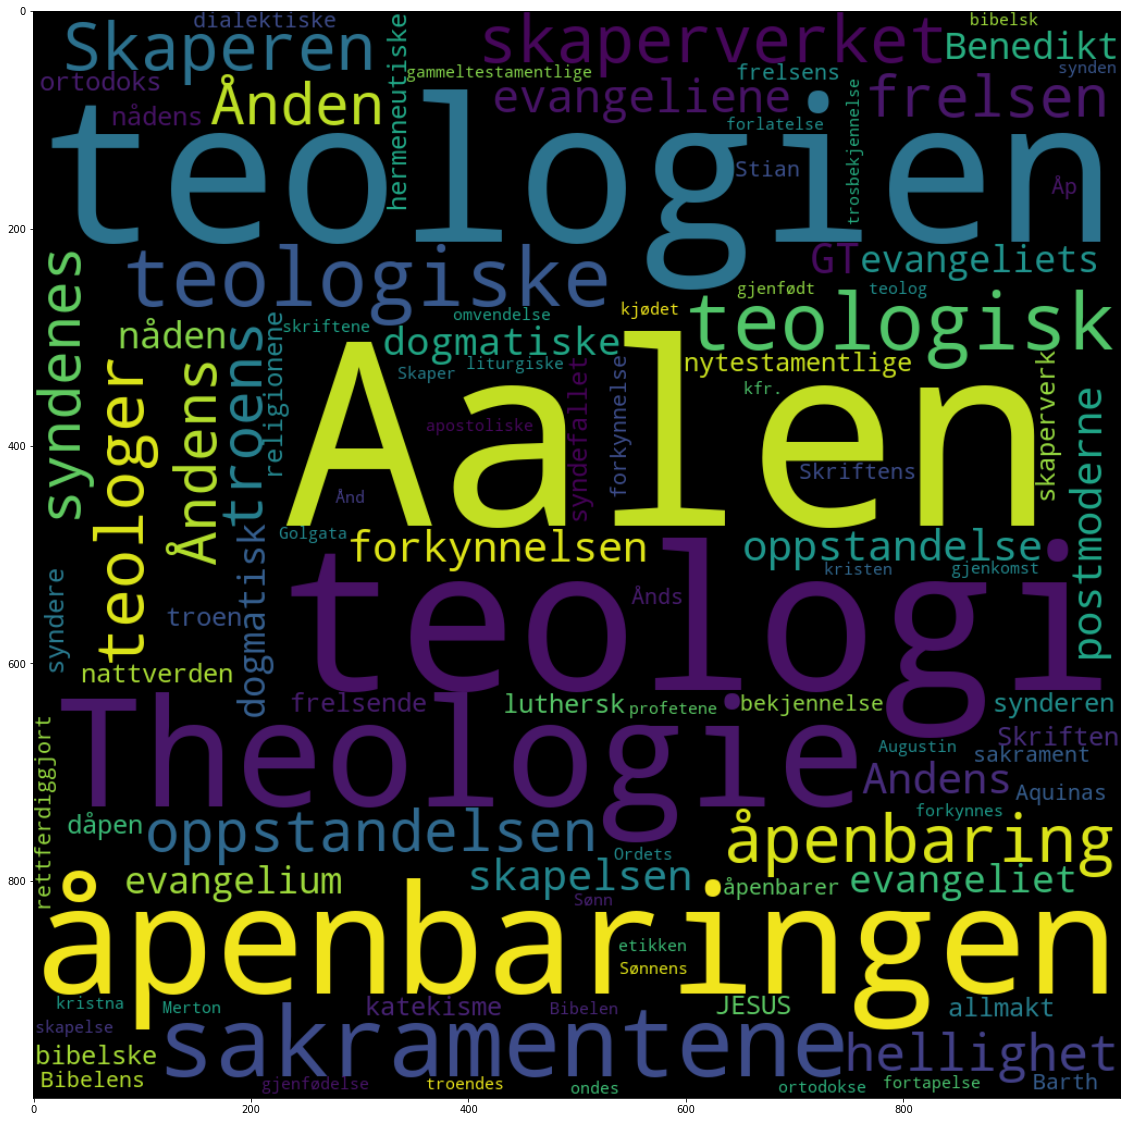

In [285]:
nb.cloud(t230[:100])

In [153]:
nb.word_variant('åpenbaringen','ent ub')

[['subst fem appell ent ub normert', 'åpenbaring'],
 ['subst mask appell ent ub normert', 'åpenbaring']]

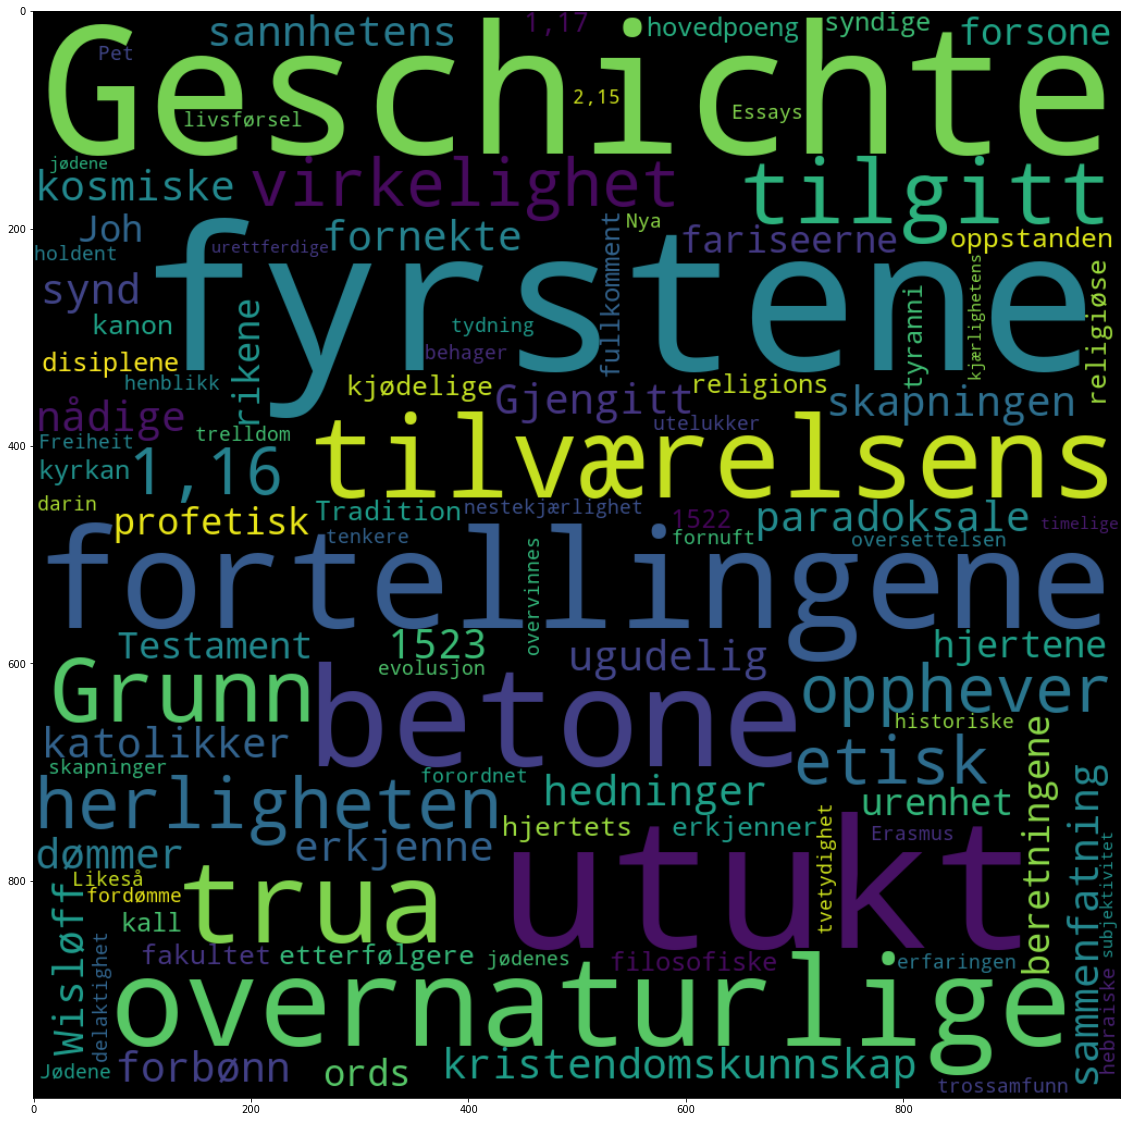

In [142]:
nb.cloud(t230[500:600])

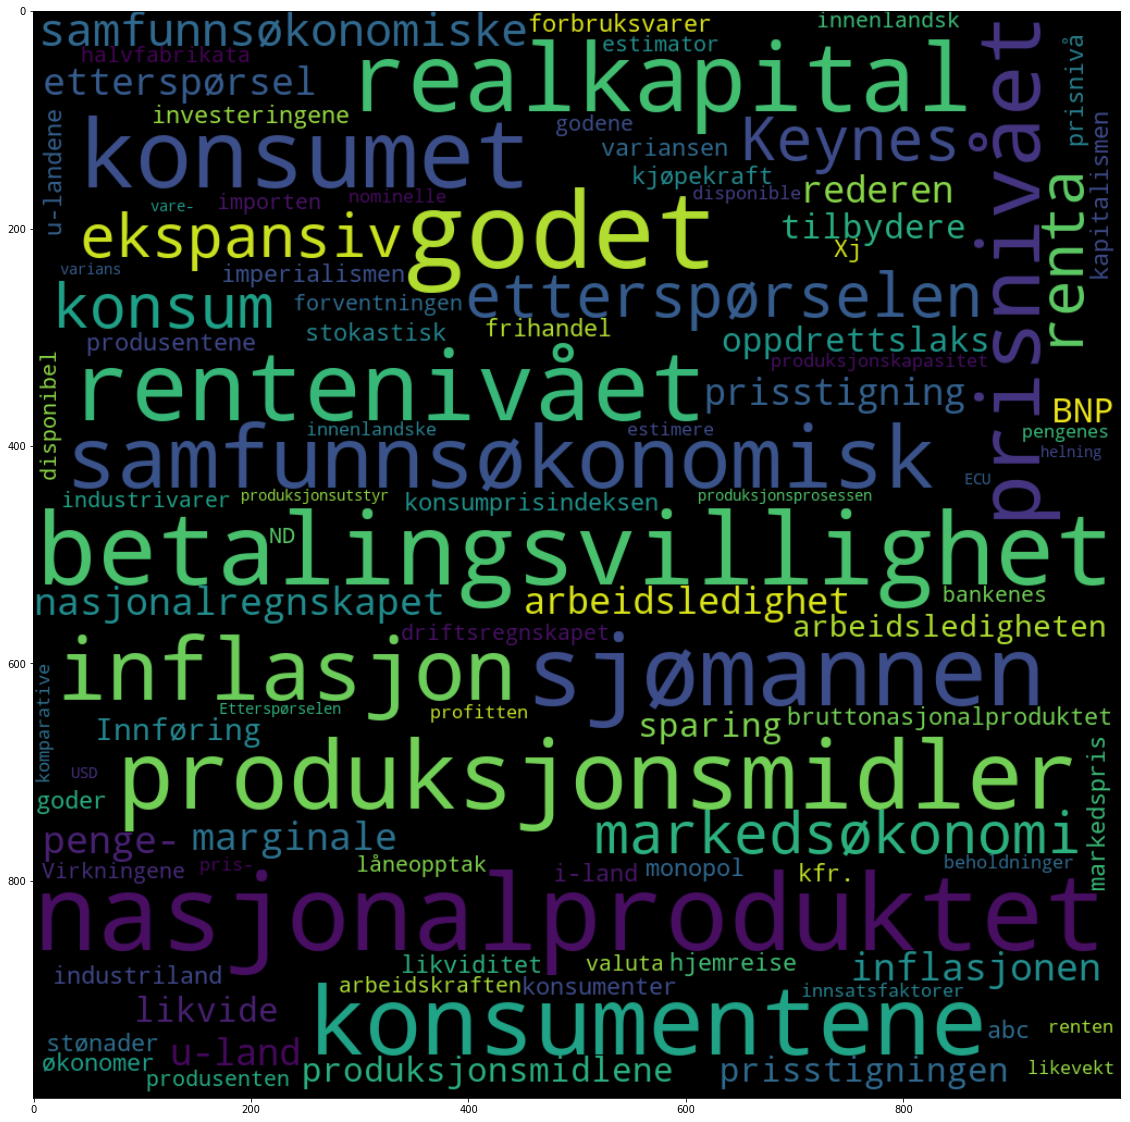

In [139]:
nb.cloud(res33[:100])

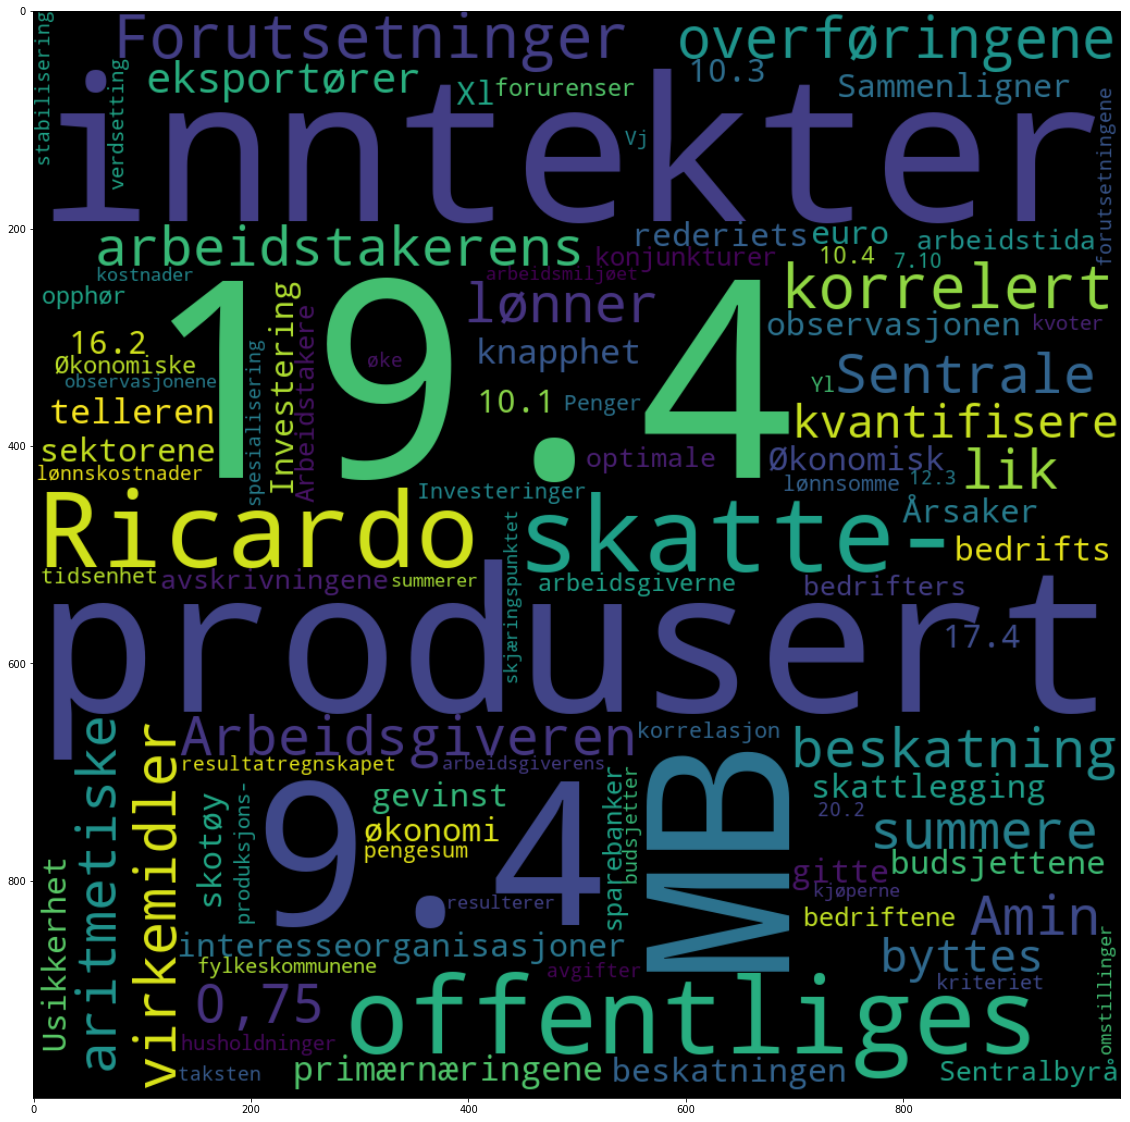

In [140]:
nb.cloud(res33[500:600])

In [122]:
nb.book_urn(ddk="335%", title='%lære%', limit=50)

[]

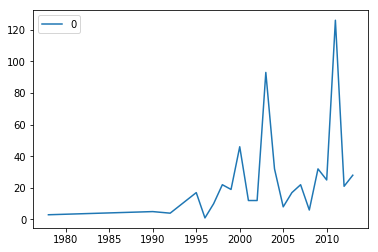

In [75]:
nb.unigram('Sushi', ddk="641%").plot()

In [46]:
(nb.unigram('ballistisk')/nb.unigram('.')).plot()

In [ ]:
nb.unigram('arbeid', media='avis')

In [47]:
uni = lambda x, p=(1990, 2010): nb.frame(nb.unigram(x, period=p), x)
uniavis = lambda x, p=(1990, 2010): nb.frame(nb.unigram(x, period=p, media='avis'),x)

In [48]:
plotting = lambda x, smooth = 1, legends=True: x.rolling(window=smooth).mean().plot(figsize=(10,5), lw = 3, legend=legends);

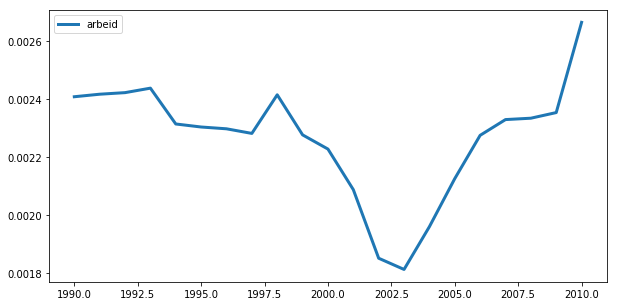

In [51]:
plotting(nb.frame(uniavis('arbeid')['arbeid']/uniavis('.')['.'], 'arbeid'))

In [14]:
data = nb.unigram('punk')
ref = nb.unigram('.')

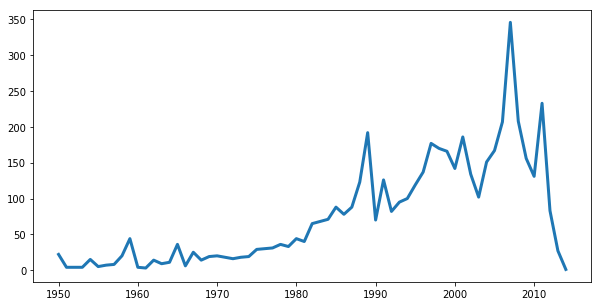

In [15]:
plotting(data, legends=False);

In [16]:
plotting(data/ref);

In [17]:
(nb.unigram('punk', media='avis')/nb.unigram('.', media='avis')).plot()

In [19]:
nb.nb_ngram("spise middag, lage middag", years=(1990, 2020), smooth=1).plot(figsize=(10,5), lw=3)

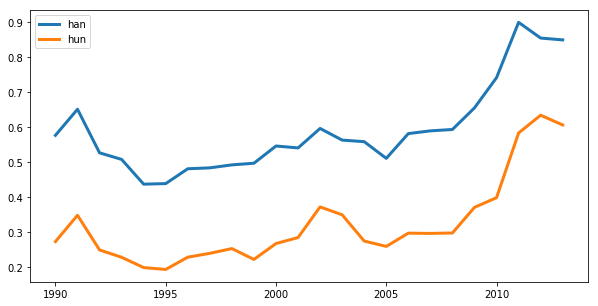

In [20]:
nb.nb_ngram("han, hun", years=(1990, 2020), smooth=1).plot(figsize=(10,5), lw=3)

### Ordmodeller

Enkeltord - kapitaliseringssensitiv

In [ ]:
G = nb.make_graph('is', cutoff = 10)

In [ ]:
gnl.show_graph(G, spread = 1.9)

In [ ]:
gnl.show_communities(G)

## Kollokasjoner

Definer et korpus - hent data fra dewey for eksempel

In [ ]:
korpus = nb.get_urn({'emne':'vinter', 'limit':100, 'year':1990, 'next':30})

In [ ]:
coll = nb.urn_coll('snø', urns= korpus, before=4, after=4)

In [ ]:
coll.sort_values(by=0, ascending=False).head(20)

Sammenling korpuset med en referanse, her tar vi hele bokhylla

In [ ]:
totalen = nb.frame(nb.totals(5000))
totalen.head()



## Ordskyer

In [ ]:
diff = (coll**1.01/totalen).sort_values(by=0, ascending = False)

In [ ]:
nb.cloud(diff[:100])

# Dokument-term-matriser

### Analyse - viktigste ord

Bygg et korpus

In [61]:
korpus_def = nb.book_urn(ddk="641%", period=(1960, 2010), limit=50, trans='')

In [62]:
len(nb.unique_urns(URNer))

50

In [63]:
nb.frame(korpus_def, 'urn forfatter tittel år'.split())

urn                forfatter  \
0   2015052148048             Tømt, Wenche   
1   2016080309038          Bjørnstad, Lars   
2   2016030248213              Brimi, Arne   
3   2013011606001        Holm, Inni-Carine   
4   2015082448325         Svarverud, Svein   
5   2011030303023                            
6   2011021703001    Jenssen, Hugo Lauritz   
7   2014120807560          Nordström, Tina   
8   2015030606015             Kåsin, Britt   
9   2014021748040      Abel, Marianne Hope   
10  2011030303020       Lillevik, Kristine   
11  2015102048025     Lodding, Sissel Keyn   
12  2012062606052      Brandtsegg, Målfrid   
13  2013082708109  Øvretveit, Ole Johannes   
14  2015092548011         Viestad, Andreas   
15  2015082048068                            
16  2012072338047       Kolstad, Siv Randi   
17  2016010807509            Gravdal, Tove   
18  2012072338007          Nordjore, Bodil   
19  2011021603004            Nordbø, Turid   
20  2011102605081    Kostveit, Åsta Østmoe   
21  2013061938057           Whitson, Craig   
22  2010032403011          Strømstad, Aase   
23  2015121548046                            
24  2016072048106          Lawson, Nigella   
25  2014012809009                            
26  2008061704003              Sato, Seigo   
27  2009031600045   Pollestad, Kjell Arild   
28  2010022303005     Steinslett, Kjellaug   
29  2011022503035       Jensen, Per Heming   
30  2015101648035     Hensley, Nina Dreyer   
31  2009031204054          Jorge, Norberto   
32  2016022448085             Hagen, Helge   
33  2011052708070            Lone, Steinar   
34  2015121548037                            
35  2013120206164  Buen, Marianne Almstrøm   
36  2012091138001                            
37  2014100108049                            
38  2008080104069          Julseth, Armand   
39  2012012308138                Homb, Eva   
40  2010060803018          Strømstad, Aase   
41  2011021603005      Grønstøl, Sigrid Bø   
42  2016070648088             Belgum, Tore   
43  2006082500023    Christensen, Dorothea   
44  2010110805047        Eidem, Paul Lorck   
45  2016031148111        Wemundstad, Bente   
46  2011070608014              Brimi, Arne   
47  2010050403066              Dege, Hroar   
48  2011100705001            Hald, Fredrik   
49  2011022503033          Christie, Helge   

                                          tittel    år  
0                                         Sommer  2005  
1                         Moderne hjemmebrygging  2001  
2   Norsk mat og kultur - en reise i landet vårt  2008  
3                      Impulser fra mitt kjøkken  1975  
4                          Verdens beste kylling  2001  
5                                     12 måneder  2001  
6                                       Restinga  2008  
7                                    Tinas beste  2009  
8                                 Alle sju slaga  1984  
9                                     Sunn start  2008  
10                                       1 porsj  2002  
11                                      Eksotisk  2002  
12                        Anne og Kåre lager mat  1979  
13                         Mat for ekte mannfolk  1994  
14                                      Ekte mat  2010  
15                                     Formkaker  1981  
16                       Det smaker av tradisjon  2006  
17                            Ett år i Champagne  2002  
18                               Bodils fjellmat  2005  
19                             Mitt tomateventyr  2009  
20                                  Ta til takke  2005  
21                               Far heter Daddy  2003  
22                      Sild til hverdag og fest  1997  
23                              Med smak av fugl  2000  
24                                Smak av sommer  2003  
25                                Hvitvinsguiden  2002  
26                                   Japansk mat  1996  
27                           Maten er halve føda  1999  
28            

In [ ]:
# hent term-matrisen med kommandoen nb.get_corpus_text( ... liste av urner ...)
dtm = nb.get_corpus_text([x[0] for x in URNer])

In [ ]:
nb.heatmap(dtm.sort_values(by = dtm.columns[1], ascending = False)[:50])

## Bruk Corpus-klassen

### Eksempel 1

Bygg korpus med kommandoen `nb.Corpus(... metadata ...)`.

In [ ]:
korpus = nb.Corpus(ddk='641%', period = (1990, 2010))

Det lages implisitt et referansekorpus fra samme periode som det sammenlignes med

In [ ]:
korpus.difference(doc_exp = 1.1, freq_exp = 1.1)

Lag en ordsky:

In [ ]:
nb.cloud(korpus.difference(doc_exp=1.1, freq_exp=1.1, aslist=False)[:100])

### Eksempel 2

In [ ]:
korpus1 = nb.Corpus(ddk='700%', period = (1990, 2010))

In [ ]:
korpus1.difference(doc_exp = 1.1, freq_exp = 1.1)

In [ ]:
nb.cloud(korpus1.difference(doc_exp=1.1, freq_exp=1.1, aslist=False)[:100])

In [ ]:
korpus2 = nb.Corpus(ddk='230%', period = (1990, 2010))

In [ ]:
korpus2.difference(doc_exp = 1.1, freq_exp = 1.1)

In [ ]:
nb.cloud(korpus2.difference(doc_exp=1.1, freq_exp=1.1, aslist=False)[:100])

In [ ]:
korpus3 = nb.Corpus(ddk='004%', period = (1990, 2010))

In [ ]:
nb.cloud(korpus3.difference(doc_exp=1.1, freq_exp=1.1, aslist=False)[:100])

In [169]:
nb.book_urn(title="%nyere%histor%", period=(1980, 2010))

[[2012090708006,
  'Skarsem, Bjørn',
  'Repetisjons &amp; oversiktshefte i nyere historie',
  2004],
 [2013102507020, 'Ugland, Ellen', 'Å lykkes med nyere historie', 2010],
 [2013080608131, 'Ugland, Ellen', 'Å lykkes med nyere historie', 2000],
 [2008011404036, 'Ugland, Ellen', 'Å lykkes med nyere historie', 1993],
 [2016071908139, 'Forsbak, Einar', 'Sparebankenes nyere historie', 2004],
 [2015081808100, 'Strand, Tor', 'Nyere historie', 1998],
 [2014011708072, 'Ugland, Ellen', 'Å lykkes med- nyere historie', 2005],
 [2007111304139, 'Holden, Finn', 'Nyere historie', 1991],
 [2009022300014, 'Heesch, Ellen J.', 'Nyere historie', 1997],
 [2016111748050, 'Gulbrandsen, Terje Fr.', 'Nyere historie', 2001],
 [2013050708067,
  'Svendsen, Jørn',
  'Nedtegnelser om Kjøvangens nyere historie',
  1998],
 [2009022500069, 'Ugland, Ellen', 'Å lykkes med nyere historie', 1997],
 [2010021600072, 'Strand, Tor', 'Nyere historie', 1999],
 [2007101800055, '', 'Nyere byhistorie i Norden', 1992],
 [2010021600

In [170]:
book = "2015081808100"

In [171]:
book_names = nb.names(book)

In [ ]:
nb